In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.preprocessing import StandardScaler , normalize , LabelEncoder ,MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
df.drop(['customerID' , 'MonthlyCharges'] , inplace=True ,axis=1)

In [13]:
# Display all column names
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'],
      dtype='object')


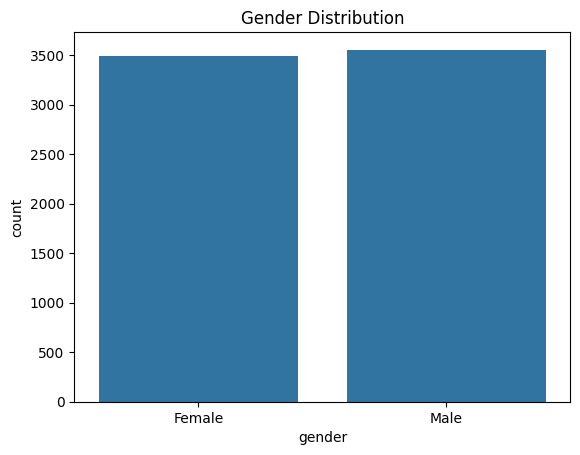

In [14]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

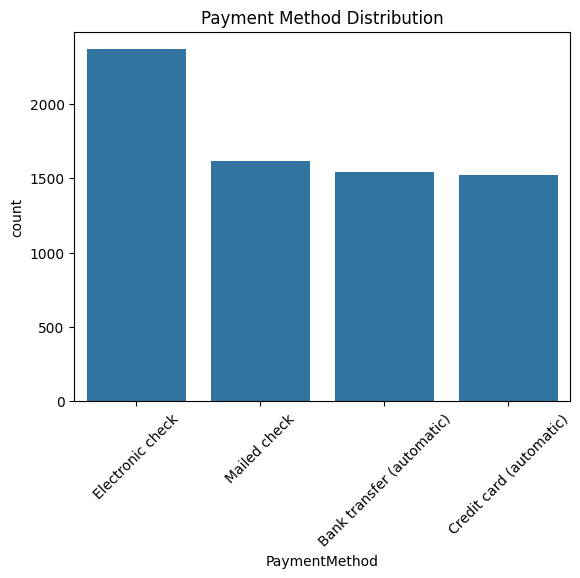

In [15]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optionally, fill NaN values with 0 or another strategy if needed
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\huzai\AppData\Local\Temp\ipykernel_59168\889612527.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


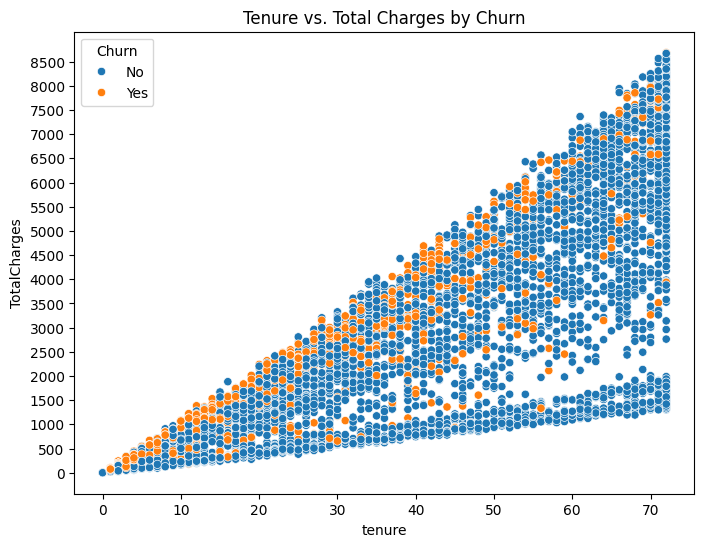

In [17]:
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)

# Adjusting the y-axis ticks to have fewer labels
plt.yticks(ticks=range(0, int(df['TotalCharges'].max()) + 1, 500))

# Adding a title
plt.title('Tenure vs. Total Charges by Churn')

# Show the plot
plt.show()

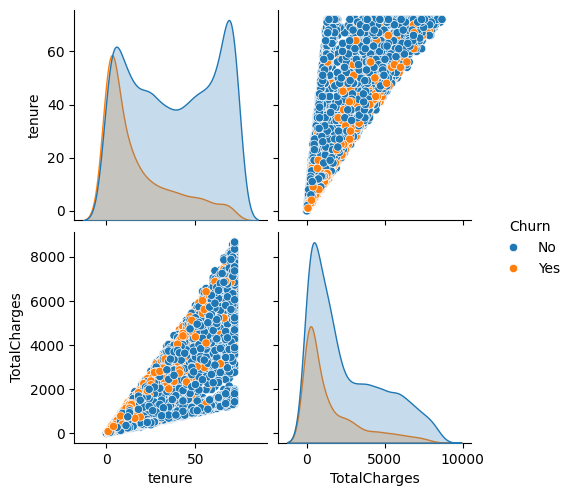

In [18]:
sns.pairplot(df[['tenure',  'TotalCharges', 'Churn']], hue='Churn')
plt.show()

In [19]:
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])
print(df[['Churn']].head())

   Churn
0      0
1      0
2      1
3      0
4      1


In [20]:
columns_to_encode = ['gender', 'PaymentMethod', 'Contract','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

print(df[columns_to_encode].head())

   gender  PaymentMethod  Contract  Partner  Dependents  PhoneService  \
0       0              2         0        1           0             0   
1       1              3         1        0           0             1   
2       1              3         0        0           0             1   
3       1              0         1        0           0             0   
4       0              2         0        0           0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 2       

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1


In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
scaler = MinMaxScaler(feature_range=(0, 3))
df[['TotalCharges', 'tenure']] = scaler.fit_transform(df[['TotalCharges', 'tenure']])
print(df[['TotalCharges', 'tenure']].head())

   TotalCharges    tenure
0      0.010311  0.041667
1      0.652692  1.416667
2      0.037358  0.083333
3      0.635852  1.875000
4      0.052385  0.083333


C:\Users\huzai\AppData\Local\Temp\ipykernel_59168\1804685965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [23]:
Y = df['Churn']

In [24]:
X = df.drop(columns=['Churn'])

In [25]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,0.041667,0,1,0,0,2,0,0,0,0,0,1,2,0.010311
1,1,0,0,0,1.416667,1,0,0,2,0,2,0,0,0,1,0,3,0.652692
2,1,0,0,0,0.083333,1,0,0,2,2,0,0,0,0,0,1,3,0.037358
3,1,0,0,0,1.875000,0,1,0,2,0,2,2,0,0,1,0,0,0.635852
4,0,0,0,0,0.083333,1,0,1,0,0,0,0,0,0,0,1,2,0.052385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1.000000,1,2,0,2,0,2,2,2,2,1,1,3,0.687581
7039,0,0,1,1,3.000000,1,2,1,0,2,2,0,2,2,1,1,1,2.543375
7040,0,0,1,1,0.458333,0,1,0,2,0,0,0,0,0,0,1,2,0.119675
7041,1,1,1,0,0.166667,1,2,1,0,0,0,0,0,0,0,1,3,0.105909


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y ,random_state=42,test_size=0.33)

In [27]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
298,1,0,1,1,1.666667,1,2,0,0,0,2,0,2,2,0,1,2,1.041734
3318,1,0,0,0,0.416667,0,1,0,0,0,2,0,0,0,0,0,3,0.088171
5586,0,0,0,0,1.125000,1,0,2,1,1,1,1,1,1,1,0,3,0.173182
6654,0,0,1,0,0.291667,1,2,1,0,0,0,0,2,0,0,1,2,0.201214
5362,1,0,1,1,2.708333,1,2,2,1,1,1,1,1,1,2,0,1,0.592449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,0.041667,1,0,1,2,0,0,0,2,2,0,1,2,0.032816
5191,0,0,1,1,0.958333,1,2,0,2,2,2,2,2,2,2,1,1,0.759361
5226,1,0,1,1,0.500000,1,0,2,1,1,1,1,1,1,0,1,2,0.105719
5390,1,1,0,0,0.500000,1,2,1,0,0,2,0,2,2,0,1,2,0.414569


In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
Y_predict = model.predict(X_test)

In [31]:
Y_predict

array([1, 0, 0, ..., 1, 1, 0])

In [59]:
accuracy_score(Y_predict,y_test)

0.8021505376344086

<h1>Accuracy using Logistic regression : 0.8021505376344086</h1>

In [55]:
neighbour = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]

In [56]:
scores = []
for n in neighbour:
    second_model = KNeighborsClassifier(n_neighbors=n)
    
    second_model.fit(X_train,y_train)
    second_y_pred = second_model.predict(X_test)
    score = accuracy_score(second_y_pred,y_test)
    scores.append(score)
    
    


In [57]:
scores

[0.7225806451612903,
 0.7565591397849463,
 0.7483870967741936,
 0.7612903225806451,
 0.7591397849462366,
 0.7698924731182796,
 0.7681720430107527,
 0.7741935483870968,
 0.7750537634408602,
 0.7763440860215054,
 0.7819354838709678,
 0.7810752688172043,
 0.7840860215053763,
 0.7832258064516129,
 0.7832258064516129,
 0.7913978494623656]

In [58]:
scores[-1]  # K = 20

0.7913978494623656

<h1>Accuracy using KNN (K=20) : 0.7913978494623656</h1>

In [60]:
third_model = DecisionTreeClassifier()

In [61]:
third_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
third_y_pred = third_model.predict(X_test)

In [63]:
accuracy_score(third_y_pred,y_test)

0.7264516129032258

<h1>Accuracy using Decision Tree : 7264516129032258</h1>

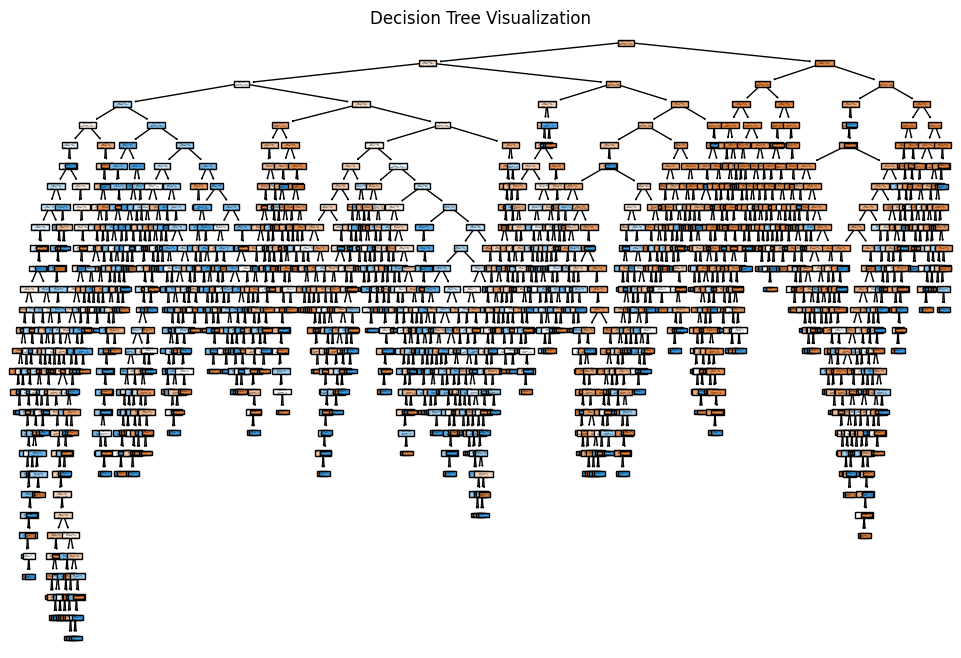

In [69]:
plt.figure(figsize=(12, 8))  # Set figure size
plot_tree(third_model, feature_names=df.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

<h2>In Order to Increase the accuracy we use  Post Prunning technique</h2>

In [76]:
depth = [3,4,5,6,7,8,9,10]

In [77]:
tree_score =[]
for d in depth:
    acc_model = DecisionTreeClassifier(max_depth=d)
    acc_model.fit(X_train,y_train)
    new_pred = acc_model.predict(X_test)
    scr = accuracy_score(new_pred,y_test)
    tree_score.append(scr)

In [78]:
tree_score

[0.7780645161290323,
 0.7840860215053763,
 0.786236559139785,
 0.7939784946236559,
 0.7952688172043011,
 0.7896774193548387,
 0.7858064516129032,
 0.7711827956989248]

<h1>At Max_depth = 8 we have the max accuracy :0.7896774193548387 </h1>

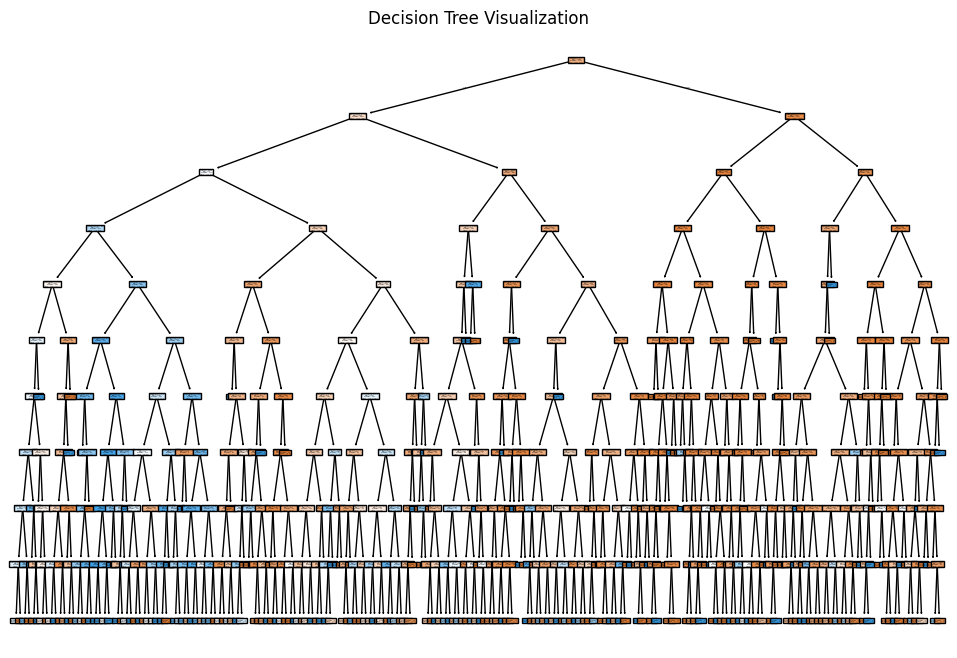

In [79]:
plt.figure(figsize=(12, 8))  # Set figure size
plot_tree(acc_model, feature_names=df.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()